In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
raw_data = pd.read_csv('forestfires.csv')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
raw_data.sample(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
84,aug,thu,91.7,114.3,661.3,6.3,20.2,45,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
492,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
345,sep,mon,91.5,130.1,807.1,7.5,16.8,43,3.1,0.0,...,0,0,0,0,0,0,0,0,1,small
425,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
180,sep,sun,92.4,124.1,680.7,8.5,23.9,32,6.7,0.0,...,0,0,0,0,0,0,0,0,1,small
111,mar,fri,91.7,33.3,77.5,9.0,18.8,18,4.5,0.0,...,0,0,0,0,1,0,0,0,0,small
118,mar,mon,90.1,39.7,86.6,6.2,10.6,30,4.0,0.0,...,0,0,0,0,1,0,0,0,0,small
126,mar,mon,87.6,52.2,103.8,5.0,9.0,49,2.2,0.0,...,0,0,0,0,1,0,0,0,0,small
438,aug,sat,93.7,231.1,715.1,8.4,23.6,53,4.0,0.0,...,0,0,0,0,0,0,0,0,0,large
103,sep,sat,92.5,121.1,674.4,8.6,24.1,29,4.5,0.0,...,0,0,0,0,0,0,0,0,1,small


In [6]:
print(raw_data['area'].value_counts())

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64


In [7]:
raw_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
raw_data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [9]:
data = raw_data.replace(['small','large'],[0,1])
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
data.shape

(517, 31)

In [11]:
X = data.iloc[:,2:30]
Y = data.iloc[:,30]

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=28,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu')) #3nd layer
model.add(Dense(1, activation='sigmoid')) #4rd layer or output layer

In [14]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                580       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 4s 14ms/step - loss: 0.7941 - accuracy: 0.6994 - val_loss: 0.8123 - val_accuracy: 0.6959
Epoch 2/250
35/35 [==============================] - 0s 5ms/step - loss: 0.5629 - accuracy: 0.7746 - val_loss: 0.6690 - val_accuracy: 0.7193
Epoch 3/250
35/35 [==============================] - 0s 4ms/step - loss: 0.5336 - accuracy: 0.7659 - val_loss: 0.5638 - val_accuracy: 0.7485
Epoch 4/250
35/35 [==============================] - 0s 6ms/step - loss: 0.4556 - accuracy: 0.7977 - val_loss: 0.5649 - val_accuracy: 0.7544
Epoch 5/250
35/35 [==============================] - 0s 5ms/step - loss: 0.4302 - accuracy: 0.8208 - val_loss: 0.6314 - val_accuracy: 0.7953
Epoch 6/250
35/35 [==============================] - 0s 5ms/step - loss: 0.4408 - accuracy: 0.8295 - val_loss: 0.6352 - val_accuracy: 0.7953
Epoch 7/250
35/35 [==============================] - 0s 5ms/step - loss: 0.3429 - accuracy: 0.8584 - val_loss: 0.5307 - val_accuracy: 0.8012
Epoch 8/250


Epoch 59/250
35/35 [==============================] - 0s 5ms/step - loss: 0.1019 - accuracy: 0.9653 - val_loss: 0.1292 - val_accuracy: 0.9415
Epoch 60/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0450 - accuracy: 0.9855 - val_loss: 0.2129 - val_accuracy: 0.9298
Epoch 61/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0374 - accuracy: 0.9827 - val_loss: 0.1683 - val_accuracy: 0.9415
Epoch 62/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.9855 - val_loss: 0.1418 - val_accuracy: 0.9532
Epoch 63/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.9855 - val_loss: 0.1250 - val_accuracy: 0.9474
Epoch 64/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.9855 - val_loss: 0.1216 - val_accuracy: 0.9474
Epoch 65/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.9798 - val_loss: 0.2220 - val_accuracy: 0.9357
Epoch 

35/35 [==============================] - 0s 7ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.1568 - val_accuracy: 0.9474
Epoch 117/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0945 - accuracy: 0.9653 - val_loss: 0.1413 - val_accuracy: 0.9298
Epoch 118/250
35/35 [==============================] - 0s 8ms/step - loss: 0.0345 - accuracy: 0.9855 - val_loss: 0.1146 - val_accuracy: 0.9532
Epoch 119/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0330 - accuracy: 0.9827 - val_loss: 0.1477 - val_accuracy: 0.9415
Epoch 120/250
35/35 [==============================] - 0s 8ms/step - loss: 0.0554 - accuracy: 0.9769 - val_loss: 0.2543 - val_accuracy: 0.9298
Epoch 121/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0629 - accuracy: 0.9769 - val_loss: 0.1226 - val_accuracy: 0.9474
Epoch 122/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0600 - accuracy: 0.9855 - val_loss: 0.3361 - val_accuracy: 0.8772
Epoch 123/250

35/35 [==============================] - 0s 5ms/step - loss: 0.0150 - accuracy: 0.9942 - val_loss: 0.1020 - val_accuracy: 0.9474
Epoch 174/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.9884 - val_loss: 0.0941 - val_accuracy: 0.9532
Epoch 175/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.1658 - val_accuracy: 0.9649
Epoch 176/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0312 - accuracy: 0.9884 - val_loss: 0.1136 - val_accuracy: 0.9298
Epoch 177/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0293 - accuracy: 0.9942 - val_loss: 0.1171 - val_accuracy: 0.9591
Epoch 178/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0311 - accuracy: 0.9884 - val_loss: 0.2618 - val_accuracy: 0.9357
Epoch 179/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0400 - accuracy: 0.9855 - val_loss: 0.1518 - val_accuracy: 0.9474
Epoch 180/250

35/35 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9855 - val_loss: 0.3217 - val_accuracy: 0.9298
Epoch 231/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.1706 - val_accuracy: 0.9415
Epoch 232/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0130 - accuracy: 0.9942 - val_loss: 0.1577 - val_accuracy: 0.9474
Epoch 233/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0170 - accuracy: 0.9913 - val_loss: 0.1348 - val_accuracy: 0.9474
Epoch 234/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0151 - accuracy: 0.9913 - val_loss: 0.1455 - val_accuracy: 0.9474
Epoch 235/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0191 - accuracy: 0.9913 - val_loss: 0.2040 - val_accuracy: 0.9474
Epoch 236/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0573 - accuracy: 0.9769 - val_loss: 0.1283 - val_accuracy: 0.9474
Epoch 237/250

In [17]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9787
accuracy: 97.87%


In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

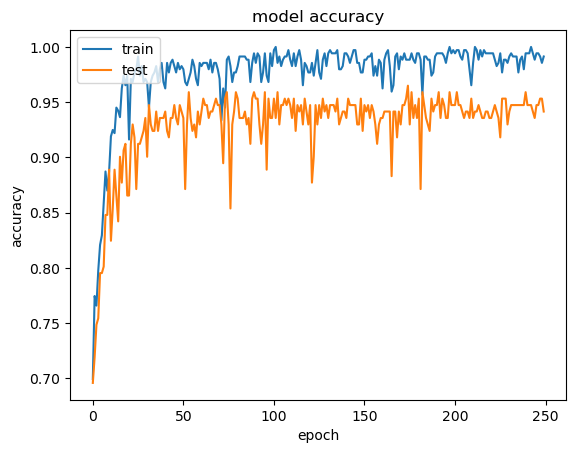

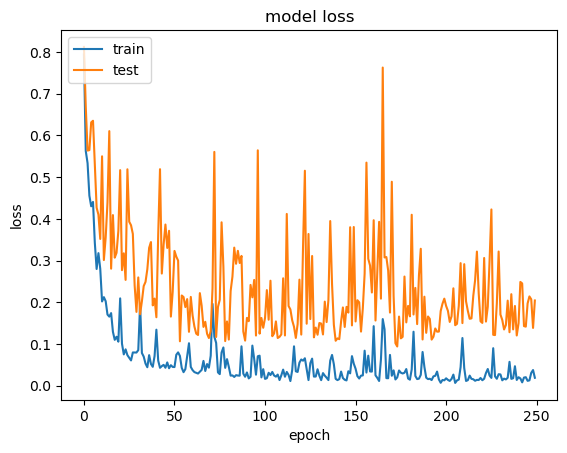

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()